# EDA crew


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crew = pd.read_csv("../Dataset/crew_etl.csv")

# configuramos pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
# Vemos la descripción de los datos y sus estadísticas.
crew.head()

,id_film,id,department,credit_id,gender,name,job,profile_path
0,862,7879.0,Directing,52fe4284c3a36847f8024f49,2.0,John Lasseter,Director,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,862,12891.0,Writing,52fe4284c3a36847f8024f4f,2.0,Joss Whedon,Screenplay,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,862,7.0,Writing,52fe4284c3a36847f8024f55,2.0,Andrew Stanton,Screenplay,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,862,12892.0,Writing,52fe4284c3a36847f8024f5b,2.0,Joel Cohen,Screenplay,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,862,12893.0,Writing,52fe4284c3a36847f8024f61,0.0,Alec Sokolow,Screenplay,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg


In [4]:
# Vemos la descripción de los datos
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465085 entries, 0 to 465084
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_film       465085 non-null  int64  
 1   id            464314 non-null  float64
 2   department    464314 non-null  object 
 3   credit_id     464314 non-null  object 
 4   gender        464314 non-null  float64
 5   name          464314 non-null  object 
 6   job           464314 non-null  object 
 7   profile_path  95098 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.4+ MB


## Tratamiento de nulos


### Porcentaje de nulos

Total de datos nulos: 374613
Total de datos: 3720680
Porcentaje de datos nulos: 10.07%


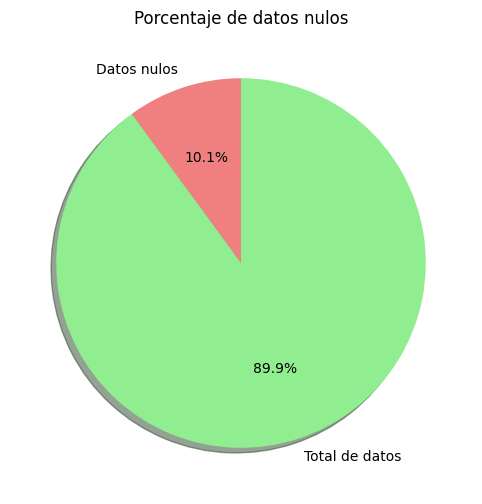

In [5]:
# Calculamos el porcentaje de valores nulos
total_nulos = crew.isna().sum().sum()
total_datos = crew.size
pct_nulos = (total_nulos / total_datos) * 100

# Imprimimos el porcentaje de los datos nulos
print(f"Total de datos nulos: {total_nulos}")
print(f"Total de datos: {total_datos}")
print(f"Porcentaje de datos nulos: {pct_nulos:.2f}%")

# preparamos el grafico
datos = [total_nulos, total_datos - total_nulos]
labels = ["Datos nulos", "Total de datos"]


# Graficamos el porcentaje de datos nulos
plt.figure(figsize=(8, 6))
plt.pie(datos, labels=labels, autopct='%1.1f%%', colors=["lightcoral", "lightgreen"],shadow=True, startangle=90)
plt.title("Porcentaje de datos nulos")
plt.show()

### Tratamos los nulos

In [8]:
print("cantidad de registros:", crew.shape[0])
crew.isna().sum()

cantidad de registros: 464314


id_film       0
id            0
department    0
credit_id     0
gender        0
name          0
job           0
dtype: int64

A simple vista se puede ver que los datos faltantes son las mismas filas, por lo cual la vamos a eliminar. En el caso de profile_path, como tiene demasiados datos nulos lo optimo seria eliminar la columna misma.

In [7]:
# Eliminamos los valores nulos
crew.dropna(subset=["id"], inplace=True)
crew.drop("profile_path", axis=1, inplace=True)

Y verificamos la cantidad de nulos y graficamos

Total de datos: 3250198
Cantidad de datos nulos: 0


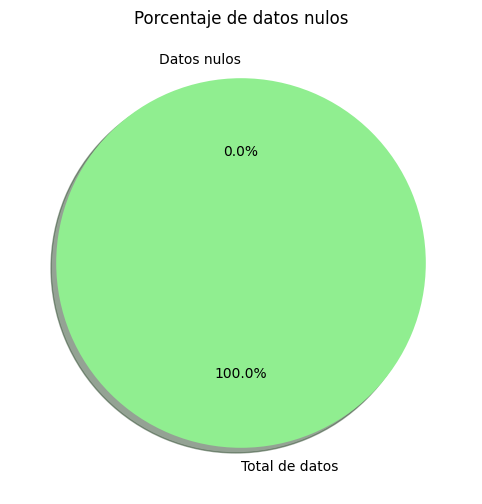

In [9]:
total_datos = crew.size
total_nulos = crew.isna().sum().sum()

print("Total de datos:", total_datos)
print("Cantidad de datos nulos:", total_nulos)

datos = [total_nulos, total_datos - total_nulos]
labels = ["Datos nulos", "Total de datos"]

# Graficamos el porcentaje de datos nulos
plt.figure(figsize=(8, 6))
plt.pie(datos, labels=labels, autopct='%1.1f%%', colors=["lightcoral", "lightgreen"],shadow=True, startangle=90)
plt.title("Porcentaje de datos nulos")
plt.show()


# Duplicados

In [11]:
print("Cantidad de datos duplicados:", crew.duplicated().sum())


Cantidad de datos duplicados: 478


### Eliminamos los datos duplicados

In [12]:
crew.drop_duplicates(inplace=True)
print("Número de datos duplicados:", crew.duplicated().sum())

Número de datos duplicados: 0


# Distribucion de los datos

### Estadisticas del dataset

In [13]:
# Mostramos la descripción de los datos y sus estadísticas.
# Uso el with para limitar los decimales y sea entendible 
with pd.option_context('display.float_format', '{:.5f}'.format):
    print(crew.describe())

           id_film            id       gender
count 463836.00000  463836.00000 463836.00000
mean   94681.67437  645591.81781      0.76000
std   115189.62955  679138.51295      0.93561
min        2.00000       1.00000      0.00000
25%    11561.75000   30255.00000      0.00000
50%    42113.00000  134806.00000      0.00000
75%   133698.00000 1388811.00000      2.00000
max   469172.00000 1908001.00000      2.00000


### Distribucion del histograma

array([[<Axes: title={'center': 'id_film'}>,
        <Axes: title={'center': 'id'}>],
       [<Axes: title={'center': 'gender'}>, <Axes: >]], dtype=object)

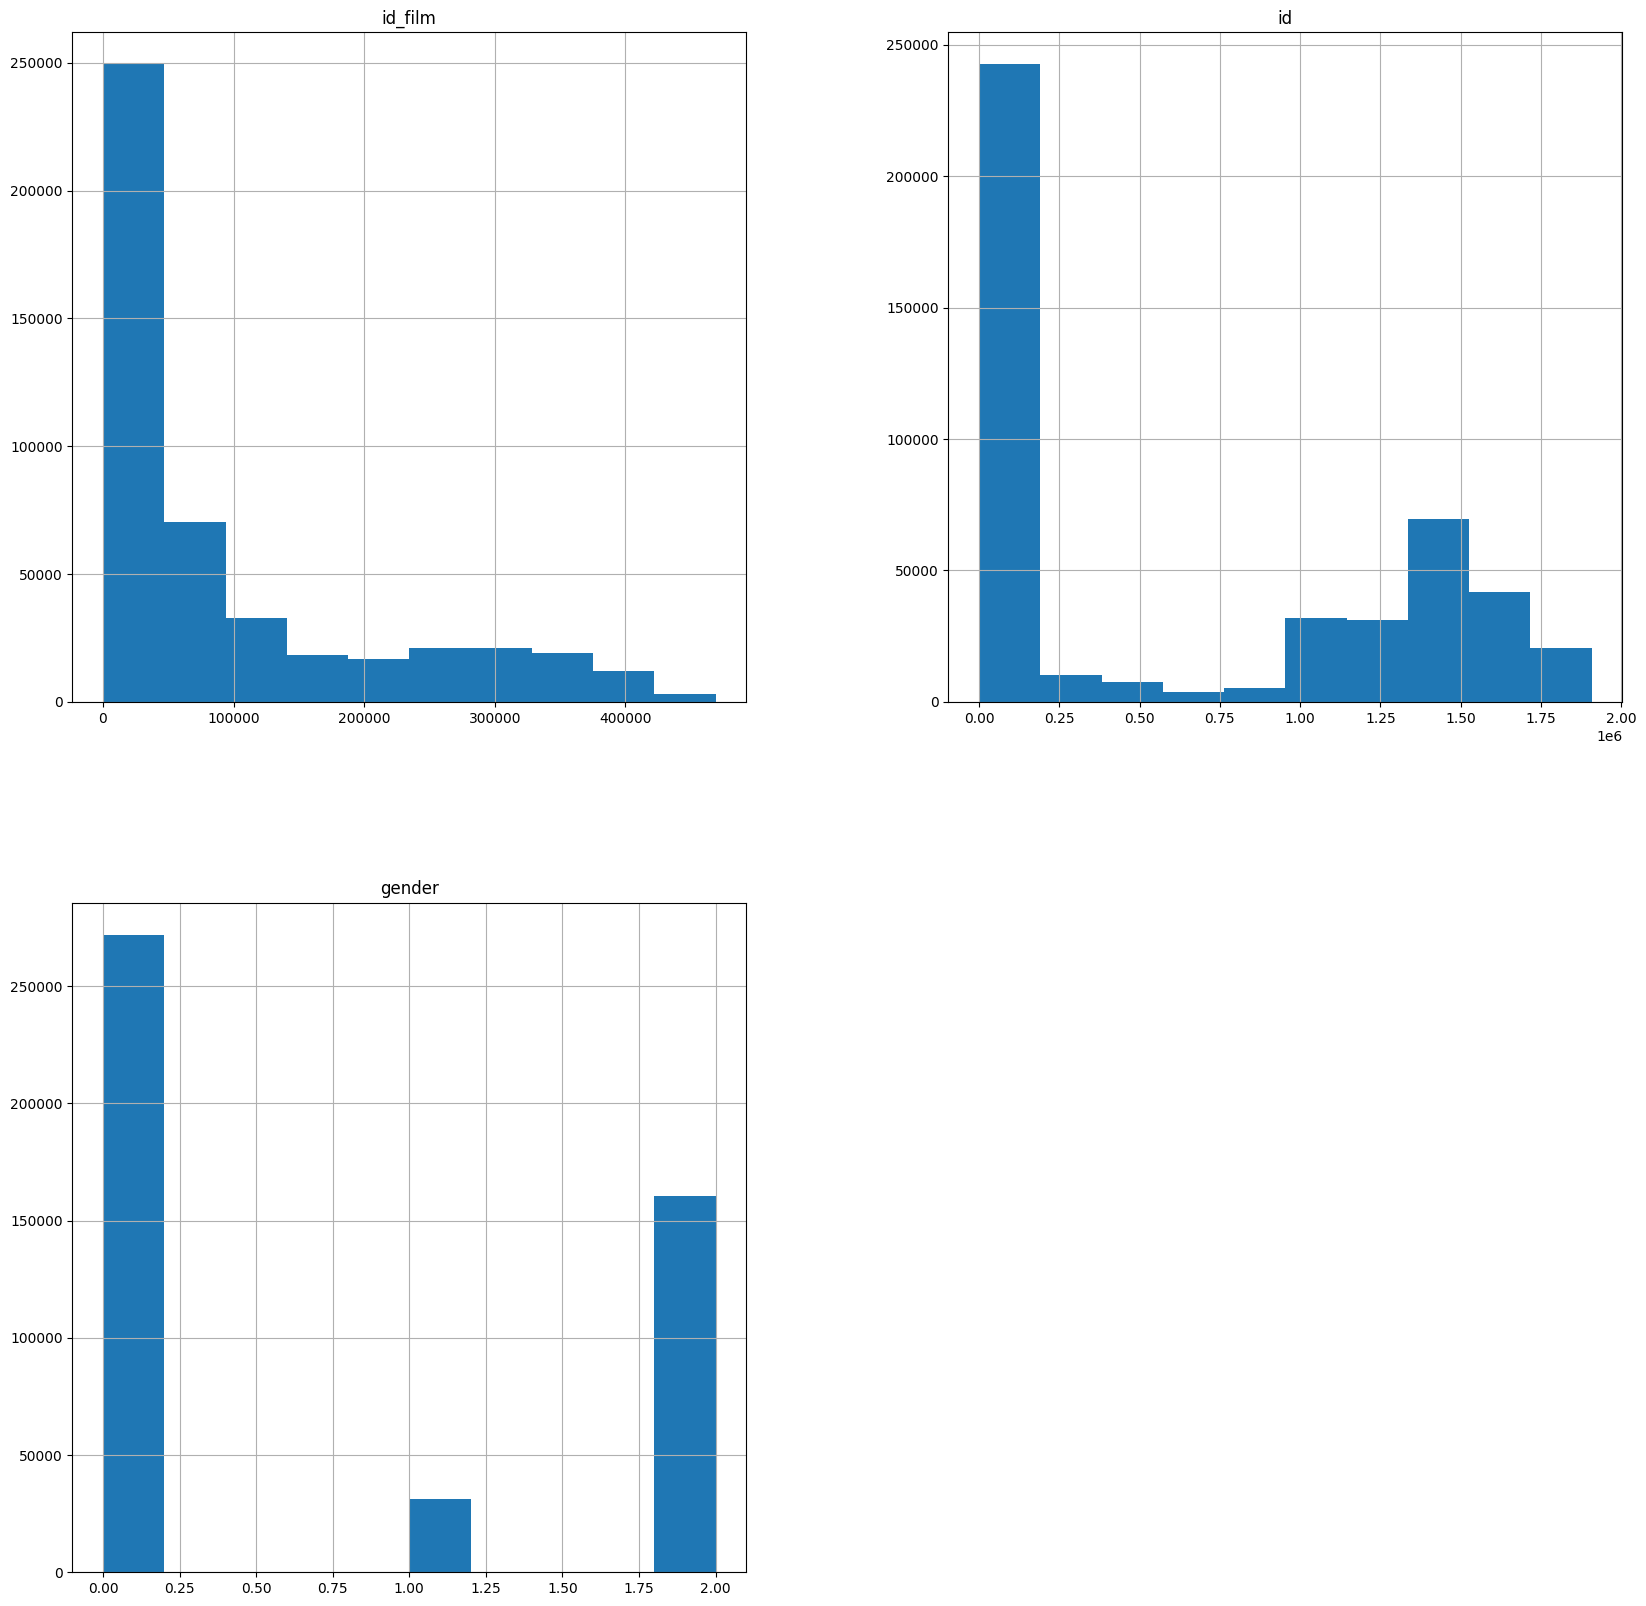

In [14]:
crew.hist(figsize=(20, 20))

### Guardar el dataset

In [18]:
crew.to_csv("../Dataset/Cleaned/crew_clean.csv", index=False)